In [28]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
path = 'C:/Users/mwood/$projects/pm25'

# clean data
df = pd.read_csv(f'{path}/data/Beijing_PM2.5.csv')
df = df.dropna(subset=['pm2.5', 'DEWP'])
df.head()
# num_points = df['No'].sum()
# print(num_points) # =930320075

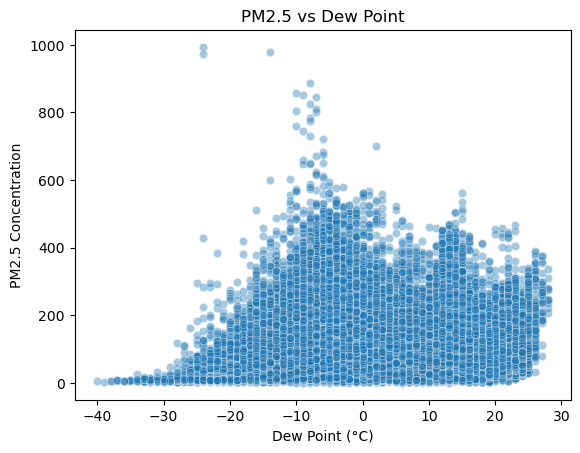

In [29]:
# basic scatterplot
sns.scatterplot(x='DEWP', y='pm2.5', data=df, alpha=0.4)
plt.title('PM2.5 vs Dew Point')
plt.xlabel('Dew Point (°C)')
plt.ylabel('PM2.5 Concentration')
plt.show()

In [30]:
# sklean ML functions
dew = df[['DEWP']]  # Dew Point (predictor)
pm = df['pm2.5']   # PM2.5 (target)

# train/test split
dew_train, dew_test, pm_train, pm_test = train_test_split(dew, pm, test_size=0.2, random_state=42)

# fit model
model = LinearRegression()
model.fit(dew_train, pm_train)

# predict
pm_pred = model.predict(dew_test)

# results
print("R² Score:", r2_score(pm_test, pm_pred))

# rmse calculation (since pre-1.4 version of skl)
rmse = np.sqrt(mean_squared_error(pm_test, pm_pred))
print("RMSE:", rmse)

R² Score: 0.02705096047027533
RMSE: 92.59133364535757


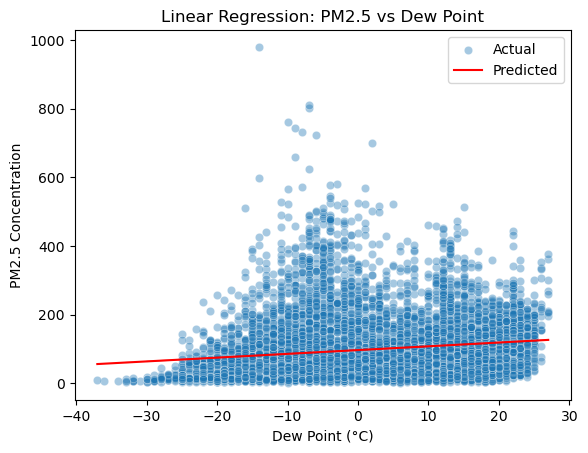

In [33]:
# regression
sns.scatterplot(x=dew_test['DEWP'], y=pm_test, alpha=0.4, label='Actual') # actual
sns.lineplot(x=dew_test['DEWP'], y=pm_pred, color='red', label='Predicted') # predicted
plt.title('Linear Regression: PM2.5 vs Dew Point')
plt.xlabel('Dew Point (°C)')
plt.ylabel('PM2.5 Concentration')
plt.legend()
plt.show()